## Bushfire Analysis using Meteorological Data


Sebastian Guerra

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- ggplot2
- caTools
- reshape2
- stats
- caTools
- caret
- kernlab

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

Forest fires has been an issue which causes many damages such as habitat, structure and life loses. In some area the animal’s ecosystem is not able to recover and the human loss tally a big number. An extract from Paulo Cortez and Anibal Morais from there paper: “A Data Mining Approach to Predict Forest Fires using Meteorological Data” give us a new perspective on how to predict forest fires. Using sensors, the tell variables such as temperature, wind, humidity and rain, models can be developed to determine which factor are critical to potentially avoid a fire. On this approach we will measure different models such as linear regression and SVM to determine which one is more accurate. 

Variables:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In [1]:
library(ggplot2)
library(reshape2)
library(stats)
library(caTools)
library(caret)
library(kernlab)



Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'kernlab' was built under R version 3.6.3"
Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



First step is to load the data to check if the file loads correctly and see the information. There's 13 variables which 2 of them are categorical which are month and day.

In [2]:
fires <- read.csv (file="forestfires.csv", header=TRUE, sep=",")
head(fires)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [3]:
summary(fires)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

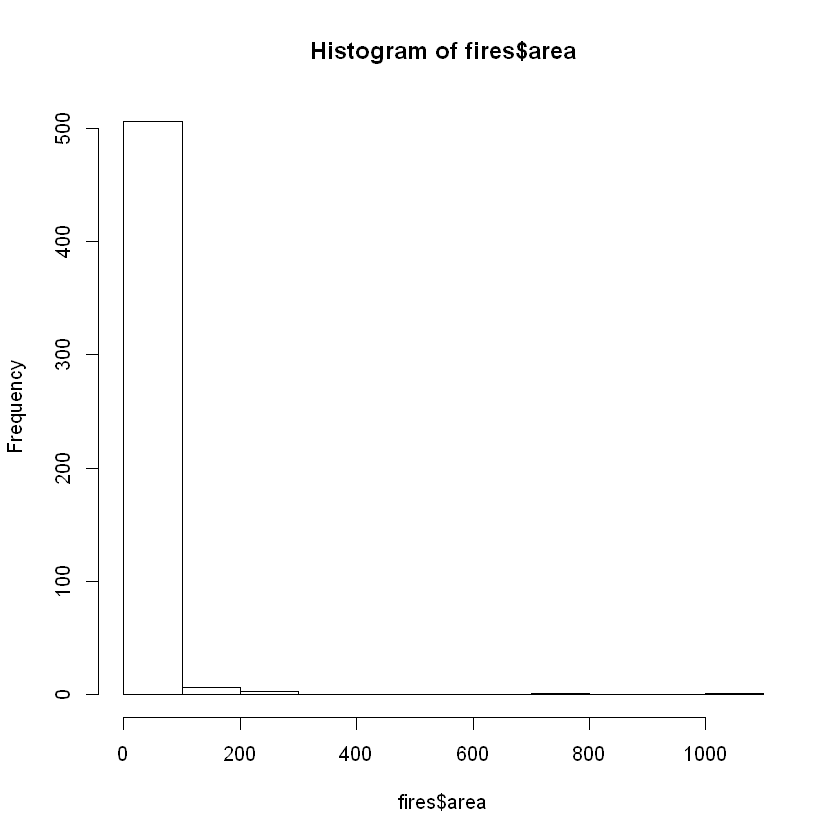

In [4]:
hist(fires$area) 



As it can be seen in the histogram, the most common value for the burnt area is 0. Which means that in most cases the conditions where to favorable for a fire to start.

Having applied a logaritmic scale we can see that the data has a normal distribution

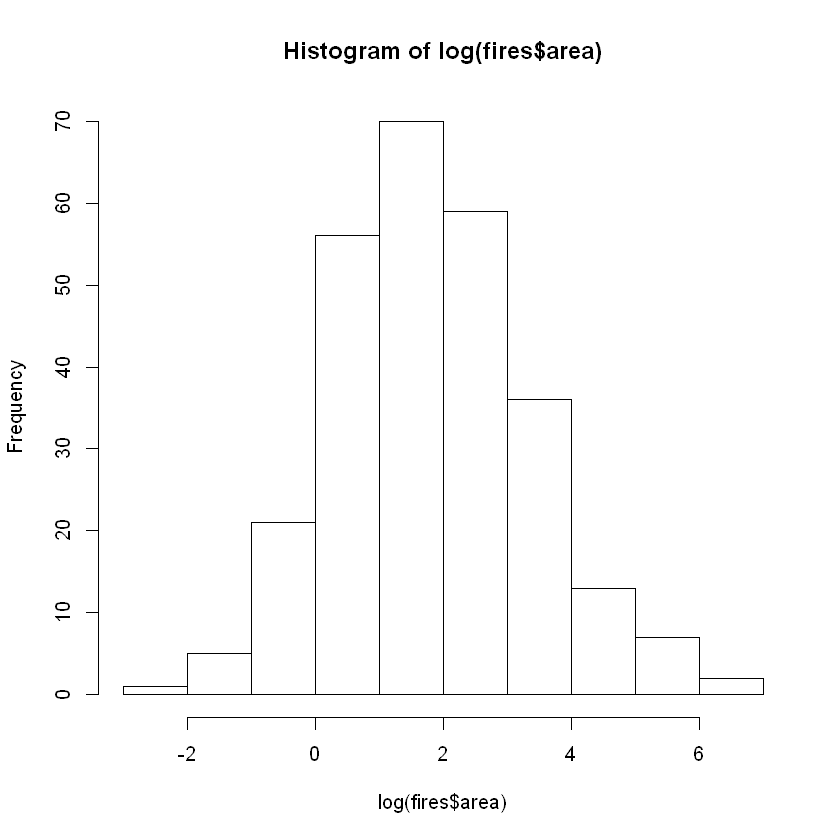

In [5]:
logFire <- (hist(log(fires$area)) )


A Boxplot can give us a better understanding of the data involved. For example the rain in the region is fairly low, meaning it could be potentialy dry and that may be a source of fire.

Temp-> The median temperature is around 20 degrees, sometimes the temperature spikes up to 30 degrees which may cause a fire during summer
rain -> Most of the rain is close to 0, this could lead into the ideal conditions to lead a fire
wind-> The wind could help spread the fire and correlates

There is more data exploration to be done in order to draw conclusions but knowing the variables is a good start

Using month, day as id variables


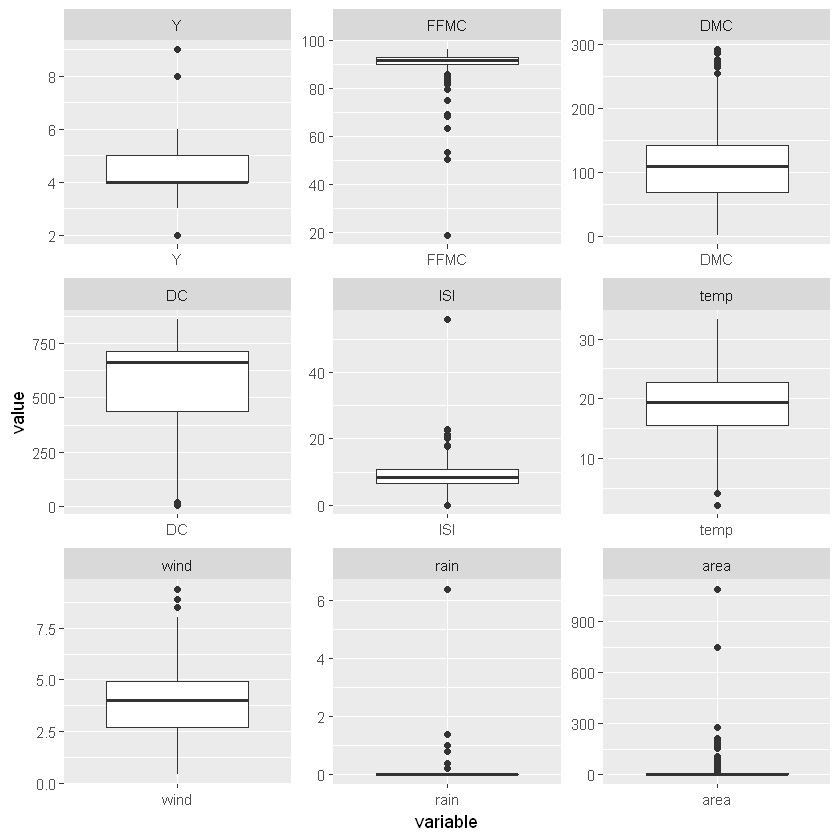

In [6]:
stats <- melt(as.data.frame(fires[,c(-1,-10)]))
ggplot(stats,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() 

As seen on the histogram of the burnt area, most of the values are area=0, this means that no fire occured. To have a better understanding lets explore the data of only the burnt area. 

Using month, day as id variables


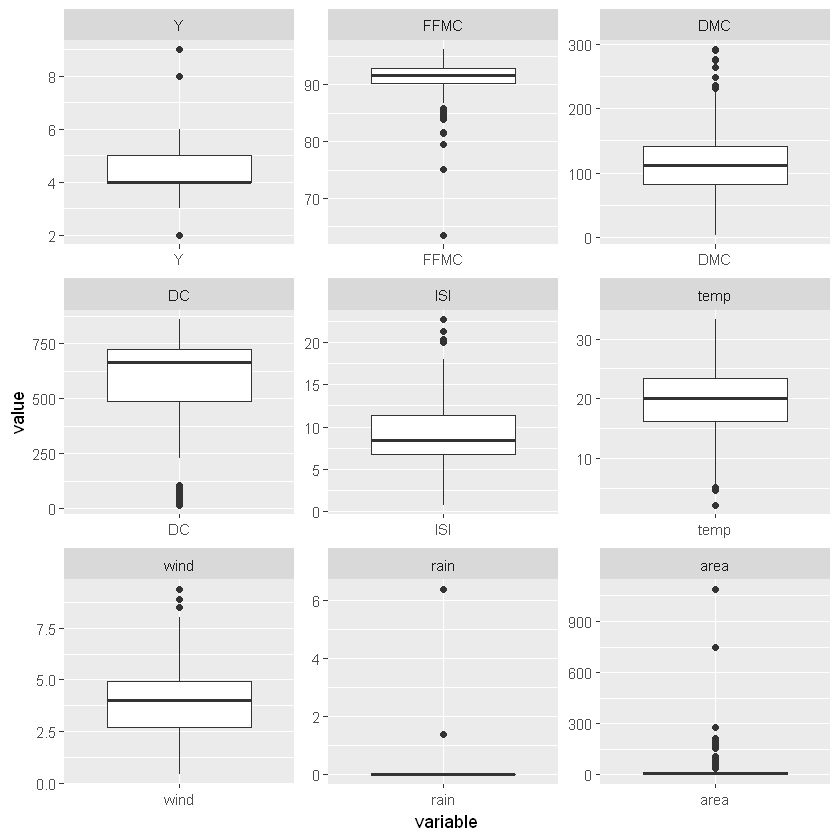

In [7]:
burnt_area <- fires[(fires[,13]>0),]
stat1<- melt(as.data.frame(burnt_area[,c(-1,-10)]))
ggplot(stat1,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() 

There is no significant change of the variables, so we can not conclude anything from it.

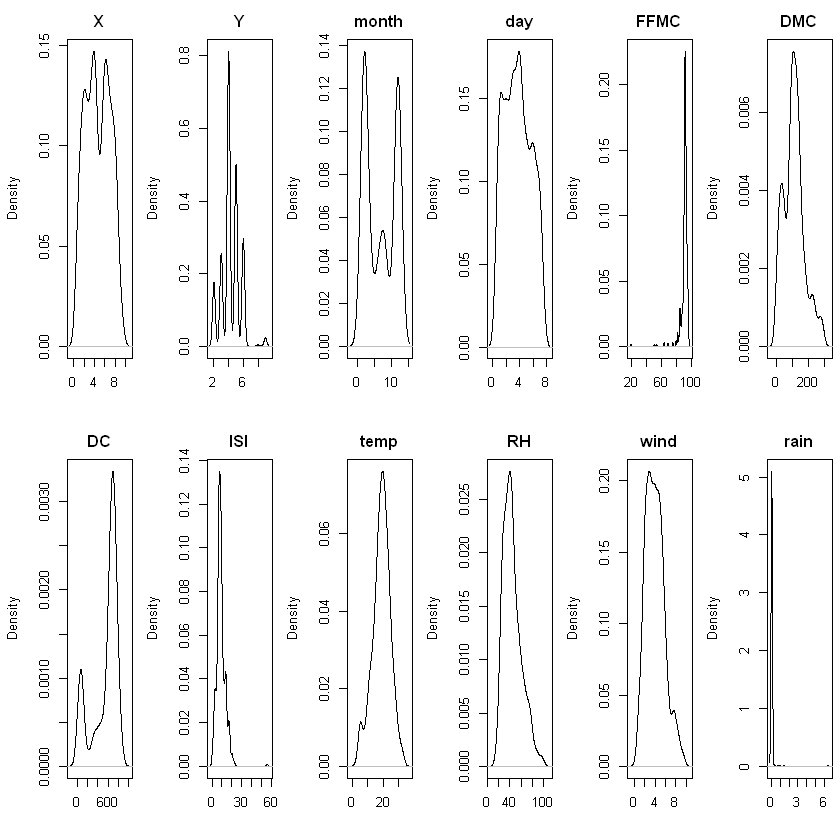

In [8]:
fires$month <- as.numeric(as.factor(fires$month))
fires$day <- as.numeric(as.factor(fires$day))
par(mfrow=c(2,6),mar=c(3.90, 4.25, 2.5, 0.5))
for (item in 1:(dim(fires)[2]-1)){
  variable = fires[,item]
  d <- density(variable)
  plot(d, main = names(fires[item]),xlab="")}

We plot the density of each variable, which rain has the least amount of variance so it won't make a huge difference n our models.

In [9]:
#please note: the following code was obtained from:  http://stackoverflow.com/questions/31709982/how-to-plot-in-r-a-correlogram-on-top-of-a-correlation-matrix
#The code was modified to satisfy the needs but the idea comes from r2evans as metioned in the link

colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    ## trick: "don't create a new plot" thing by following the
    ## advice here: http://www.r-bloggers.com/multiple-y-axis-in-a-r-plot/
    ## This allows
    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}


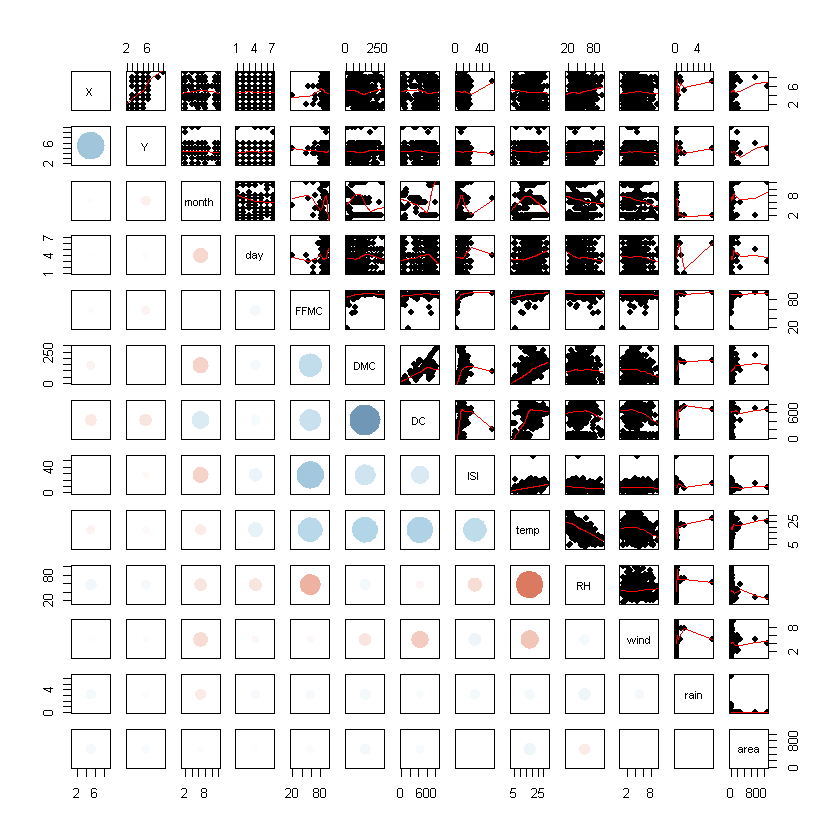

In [10]:
pairs(fires[,c(1,2,3,4,5,6,7,8,9,10,11,12,13)], pch = 19,panel=panel.smooth,lower.panel=panel.cor)

Blue circles will show a positive correlation while orange circles will show a negative correlation, the bigger correlation between variables means the bigger the circle. 

Temperatue stands out among most of the variables. It has a negative strong correlation with RH and positive strong correlation with ISI, DC, DMC and FFMC

There is no actual correlation between the area burnt and the other variables.

There are two variables in the dataset that are categorical which are month and day. The month could give us an indicator if the fires have a higher occurance in summer since it's usually hotter and dryer. In the other hand, many of the bushfires around the world have a human factor in it so weekends could have a higer chance of occuring a bushfire. Let's take a look:

Warning message:
"Use of `burnt_area$month` is discouraged. Use `month` instead."Warning message:
"Use of `burnt_area$area` is discouraged. Use `area` instead."

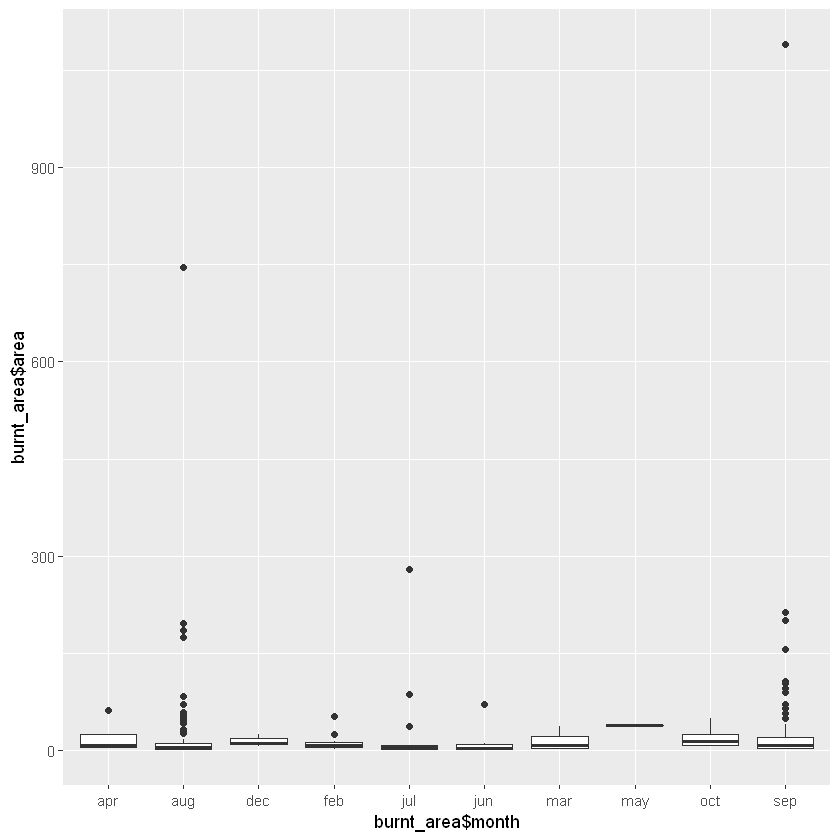

In [11]:
ggplot(burnt_area,aes( burnt_area$month, burnt_area$area)) + geom_boxplot()

There is no particular patter we can see from the months, only thing is that in Sept and Aug 2 big fires occured. Can be an outlier or potentialy fires that occured. 

Warning message:
"Use of `burnt_area$day` is discouraged. Use `day` instead."Warning message:
"Use of `burnt_area$area` is discouraged. Use `area` instead."

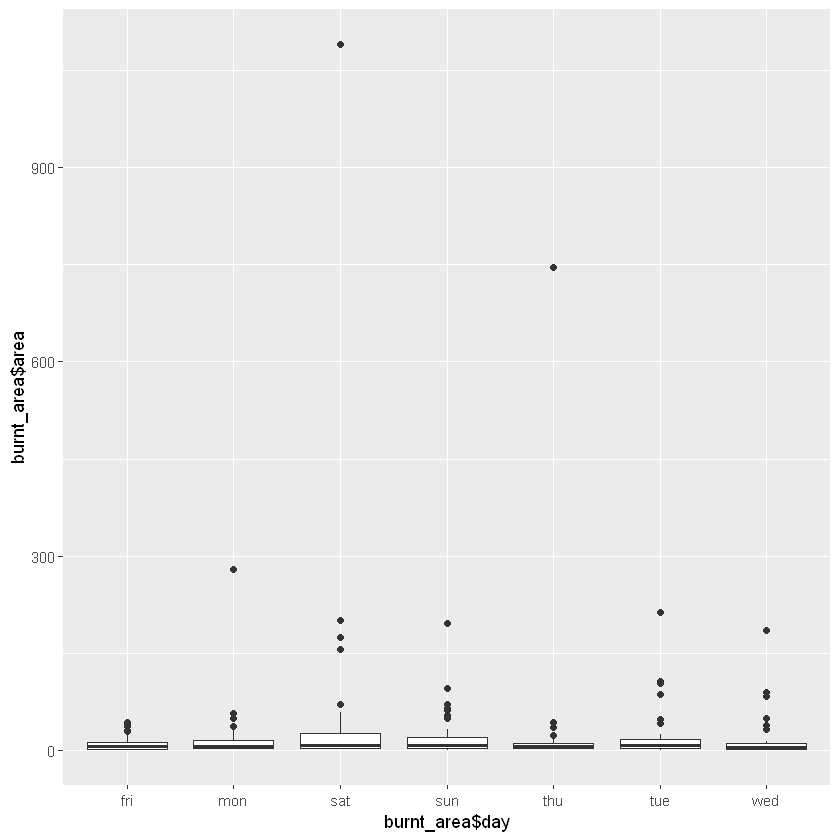

In [12]:
ggplot(burnt_area,aes( burnt_area$day, burnt_area$area)) + geom_boxplot()

For the day there's no obvious relation between the day of the week vs area burnt so we can no conclude anything. 

## 3. Model Development<a class="anchor" id="sec_3"></a>

The first model that's going to be developed is the multivariate linea regression which first the data will need to be split into training and testing:

In [13]:
library (caTools)
set.seed(123)
sample = sample.split(fires,SplitRatio = 0.80) 
fire_train =subset(fires,sample ==TRUE) 
fire_test=subset(fires, sample==FALSE)

In [14]:
lfire = lm(area~., data  = fire_train)
summary (lfire)


Call:
lm(formula = area ~ ., data = fire_train)

Residuals:
   Min     1Q Median     3Q    Max 
-35.22 -13.61  -7.65  -0.44 718.31 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4.955609  51.369392   0.096   0.9232  
X            2.269211   1.222439   1.856   0.0642 .
Y           -2.256692   2.334095  -0.967   0.3342  
month        0.220151   0.646994   0.340   0.7338  
day          0.499430   1.241792   0.402   0.6878  
FFMC        -0.036370   0.520049  -0.070   0.9443  
DMC          0.102152   0.059564   1.715   0.0872 .
DC          -0.009667   0.015588  -0.620   0.5355  
ISI         -0.504455   0.618389  -0.816   0.4151  
temp         0.311540   0.679488   0.458   0.6469  
RH          -0.128397   0.208382  -0.616   0.5381  
wind         0.991194   1.432835   0.692   0.4895  
rain        -2.632874   7.248154  -0.363   0.7166  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46.85 on 385 degrees of freedom

From the data above we can notice that all of the variables are not significant to try to explain the burnt area of the forest. But let's take a deeper look on the model. 

In [15]:
summary(lfire)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.955608752,51.36939203,0.09647007,0.92319744
X,2.269210900,1.22243894,1.85629795,0.06417488
Y,-2.256692063,2.33409465,-0.96683828,0.33423182
month,0.220151470,0.64699418,0.34026809,0.73384023
day,0.499429848,1.24179160,0.40218491,0.68777113
FFMC,-0.036370179,0.52004877,-0.06993609,0.94428084
DMC,0.102152131,0.05956401,1.71499768,0.08715031
DC,-0.009667075,0.01558841,-0.62014496,0.53552923
ISI,-0.504455149,0.61838940,-0.81575646,0.41514384
temp,0.311539575,0.67948809,0.45849159,0.64685800


In [16]:
cor(fires[,c(1,2,5,6,7,8,9,10,11,12,13)])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000000,0.539548171,-0.02103927,-0.048384178,-0.08591612,0.006209941,-0.05125826,0.08522319,0.01879782,0.065387168,0.063385299
Y,0.539548171,1.000000000,-0.04630755,0.007781561,-0.10117777,-0.024487992,-0.02410308,0.06222073,-0.02034085,0.033234103,0.044873225
FFMC,-0.021039272,-0.046307546,1.00000000,0.382618800,0.33051180,0.531804931,0.43153226,-0.30099542,-0.02848481,0.056701533,0.040122004
DMC,-0.048384178,0.007781561,0.38261880,1.000000000,0.68219161,0.305127835,0.46959384,0.07379494,-0.10534225,0.074789982,0.072994296
DC,-0.085916123,-0.101177767,0.33051180,0.682191612,1.00000000,0.229154169,0.49620805,-0.03919165,-0.20346569,0.035860862,0.049383225
ISI,0.006209941,-0.024487992,0.53180493,0.305127835,0.22915417,1.000000000,0.39428710,-0.13251718,0.10682589,0.067668190,0.008257688
temp,-0.051258262,-0.024103084,0.43153226,0.469593844,0.49620805,0.394287104,1.00000000,-0.52739034,-0.22711622,0.069490547,0.097844107
RH,0.085223194,0.062220731,-0.30099542,0.073794941,-0.03919165,-0.132517177,-0.52739034,1.00000000,0.06941007,0.099751223,-0.075518563
wind,0.018797818,-0.020340852,-0.02848481,-0.105342253,-0.20346569,0.106825888,-0.22711622,0.06941007,1.00000000,0.061118880,0.012317277
rain,0.065387168,0.033234103,0.05670153,0.074789982,0.03586086,0.067668190,0.06949055,0.09975122,0.06111888,1.000000000,-0.007365729


For the correlation between variables we are able to see high correlations between DMC and DC. Temperature also seems to have a high correlations with other variables. However, with the area we don't see any high correlations to try to explain the fires. 

In [17]:
lmodel=predict(lfire, newdata=fire_test)
data.frame(Area_Burned= fire_test$area, prediction=lmodel, residual = lmodel-fire_test$area )

,Area_Burned,prediction,residual
5,0,2.1142277,2.1142277
8,0,4.8869303,4.8869303
11,0,15.1205599,15.1205599
18,0,11.5997682,11.5997682
21,0,18.1164150,18.1164150
24,0,19.7801396,19.7801396
31,0,13.8919965,13.8919965
34,0,14.0243290,14.0243290
37,0,15.8312450,15.8312450
44,0,7.0552085,7.0552085


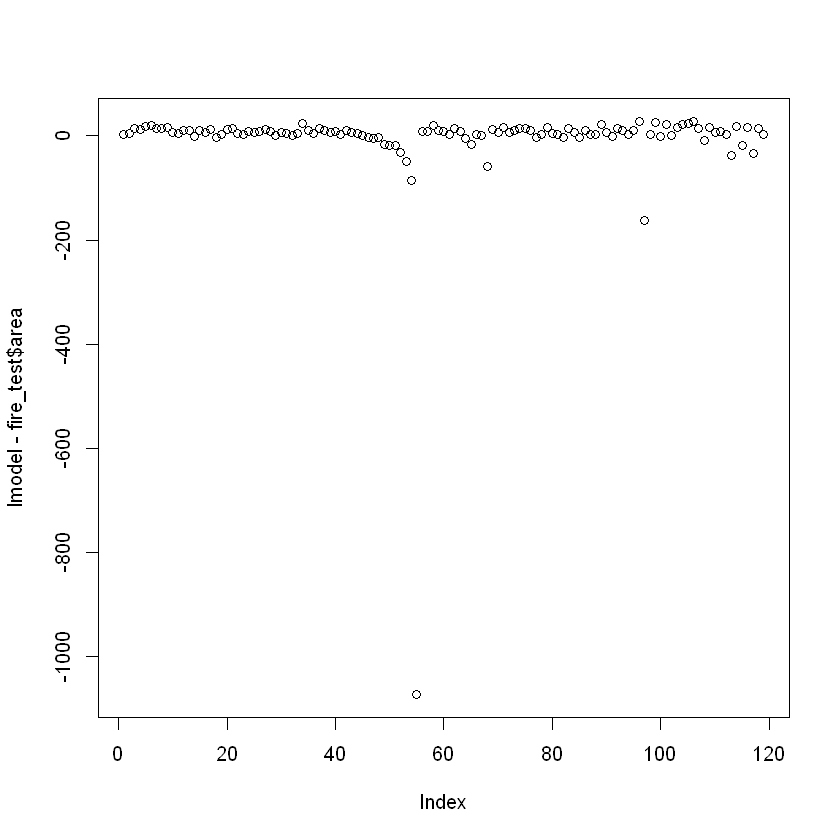

In [18]:
plot(lmodel-fire_test$area)


Much of the residuals are pretty small this is due that the area burnt in the fires are usually very small as seen in the data exploration, there's an outlier so lets see what can the model tell us without the outlier. 

Warning message in lmodel - fire_test$area[fire_test$area < 500]:
"longer object length is not a multiple of shorter object length"

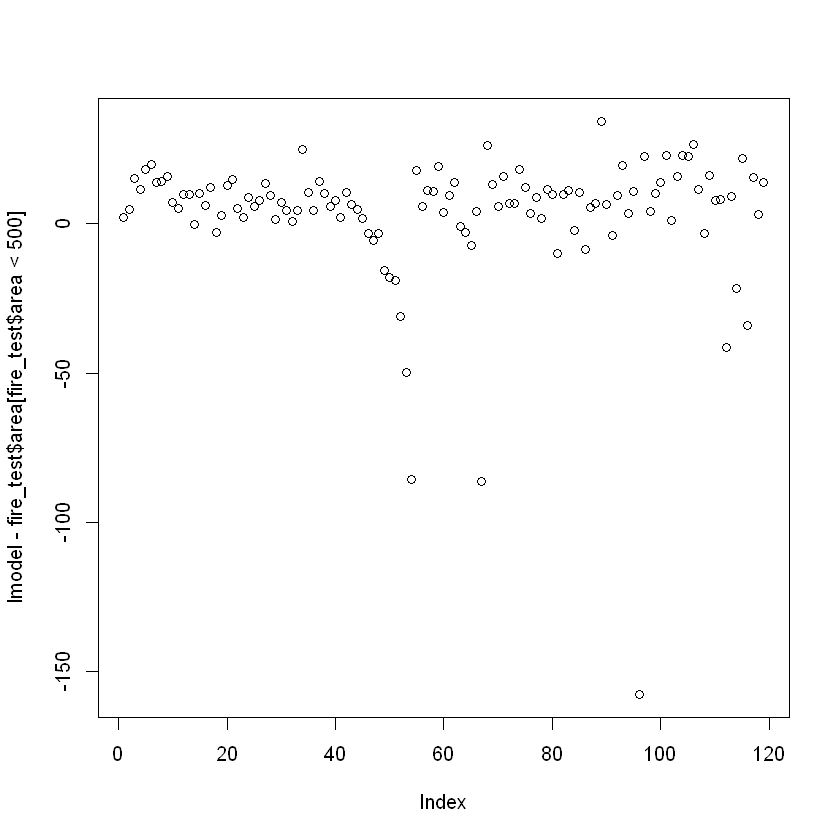

In [19]:
plot(lmodel-fire_test$area[fire_test$area<500])

As mentioned above, most of the fires are quite small. Therefor, the residuals tend to be close to 0.

In [20]:
MAE(lmodel, fire_test$area)
RMSE(lmodel, fire_test$area)
R2(lmodel, fire_test$area, form = "traditional")

[1] 22.04092

[1] 100.8511

[1] 0.00999122

Lastly we compared the accuracy of the model with the R2, it's only 0.0099 which means the model doesn't explains much of the area burnt. We could see that coming since none of the variables were significant in trying to explain the area burnt so it was expected to have such low R2. 

# SVM:

The next model we are going to compare is Support Vectore Machine to see if we can get a better model

In [21]:
require("e1071")


Loading required package: e1071
Warning message:
"package 'e1071' was built under R version 3.6.3"

In [22]:
 model <- svm(area ~., data=fire_train,  gamma = '1.316872e-06', cost = 100, kernel = "linear")

In [23]:
svm_prediction <- predict(model, newdata = fire_test)


As multivariate regression, this model is not the best to try to explain and predict the area of the fire. The R2 obtained is -0.0161.

In [24]:
MAE(svm_prediction , fire_test$area)
RMSE(svm_prediction , fire_test$area)
R2(svm_prediction , fire_test$area, form = "traditional")

[1] 18.58056

[1] 102.1736

[1] -0.01614376

For the last model we are going to change things a little. SVM will be used but in a categorical way. The output will only be yes fire and no fire. It is going to be this way to change the approach, since we didn't obtained meaningful results in the previous models. 

The area burnt will have to change to the following:

0 = no fire
0< = fire

we are going to predict weather a fire or not would occur

In [45]:
#SVM
#created a copy of the dataset since we are going to add a column weather a fire occured or not. It's not to alter the original dataset
fire_train1<-fire_train
fire_test1<-fire_test
fire_train1$area2<- fire_train1$area  
fire_test1$area2<- fire_test1$area
fire_train1$area2[fire_train1$area>0] <-1
fire_test1$area2[fire_test1$area2>0]<-1

#changing the data into categorical

fire_train1[["area2"]] = factor(fire_train1[["area2"]])

The next step is building the model and choose the following parameters:
method: Repeated Crossvalidation
number: Times to do the resampling iterations
repeat: sets to compute the repeated cross validations

In [26]:
train_data <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [27]:
install.packages('e1071', dependencies=TRUE)

Installing package into 'C:/Users/Sebastian/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'e1071' is in use and will not be installed"

In [28]:
fire_svm <- train(area2 ~rain+temp+RH+wind+ISI+DC+DMC+FFMC+month+day+X+Y, data = fire_train1, method = "svmLinear",
trvControl=train_data,
preProcess = c("center", "scale"),
tuneLength = 10)

In [29]:
fire_svm

Support Vector Machines with Linear Kernel 

398 samples
 12 predictor
  2 classes: '0', '1' 

Pre-processing: centered (12), scaled (12) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 398, 398, 398, 398, 398, 398, ... 
Resampling results:

  Accuracy   Kappa      
  0.5007181  0.004264639

Tuning parameter 'C' was held constant at a value of 1

In [30]:
fire_prediction <- predict(fire_svm, newdata= fire_test1)
confusionMatrix(table(fire_prediction, fire_test1$area2))

Confusion Matrix and Statistics

               
fire_prediction  0  1
              0 16 13
              1 39 51
                                          
               Accuracy : 0.563           
                 95% CI : (0.4691, 0.6537)
    No Information Rate : 0.5378          
    P-Value [Acc > NIR] : 0.3236310       
                                          
                  Kappa : 0.0908          
                                          
 Mcnemar's Test P-Value : 0.0005265       
                                          
            Sensitivity : 0.2909          
            Specificity : 0.7969          
         Pos Pred Value : 0.5517          
         Neg Pred Value : 0.5667          
             Prevalence : 0.4622          
         Detection Rate : 0.1345          
   Detection Prevalence : 0.2437          
      Balanced Accuracy : 0.5439          
                                          
       'Positive' Class : 0               
                         

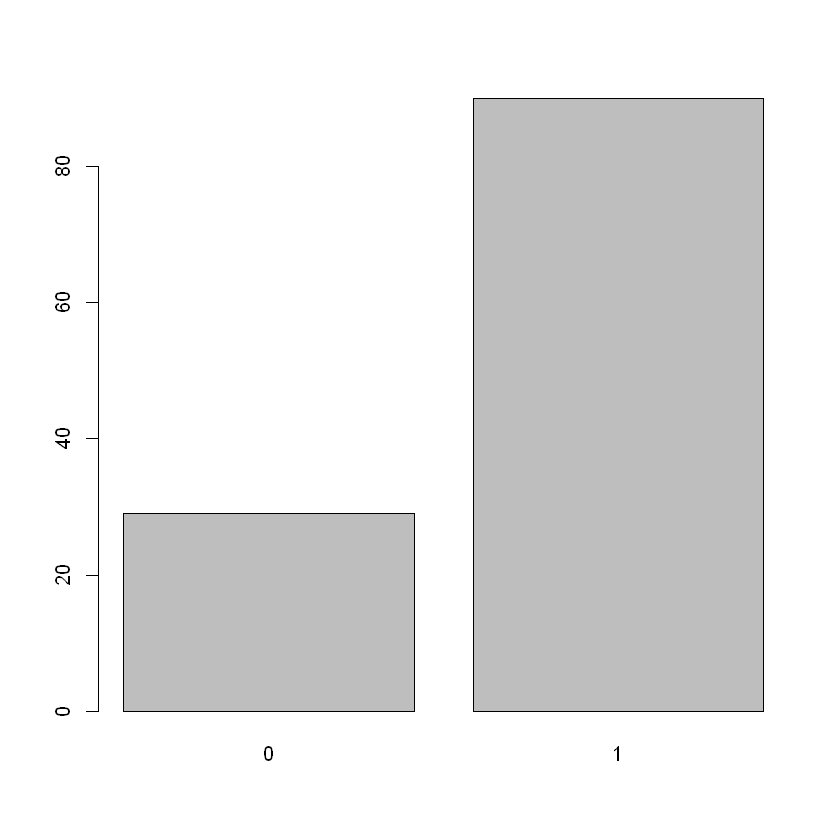

In [31]:
plot(fire_prediction)

This gives us an accuracy of 56%! Still not the best but it's much more higher than the previous models. 

## Logistic Regression

Removing the area column to train the model

In [46]:

fire_train1 <- subset(fire_train1, select= -c(area))
tail(fire_train1)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area2
510,5,4,2,1,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,1
511,6,5,2,1,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,1
513,4,3,2,4,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1
514,2,4,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1
516,1,4,2,3,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0
517,6,3,10,6,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0


In [43]:
fire_test1 <- subset(fire_test1, select= -c(area))
tail(fire_test1)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area2
492,4,4,2,5,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,0
499,6,5,2,6,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,1
502,7,5,2,6,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0
505,4,3,2,7,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,1
512,8,6,2,4,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0
515,7,4,2,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1


With glm function we can train the Logistic regression model

In [54]:
glm.fit<- glm(area2~., data = fire_train1, family = binomial)
summary(glm.fit)


Call:
glm(formula = area2 ~ ., family = binomial, data = fire_train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5214  -1.1845   0.9244   1.1110   1.5315  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -6.2530424  3.0537660  -2.048   0.0406 *
X            0.0271457  0.0528326   0.514   0.6074  
Y            0.1102362  0.1015277   1.086   0.2776  
month       -0.0241843  0.0281837  -0.858   0.3908  
day          0.0158338  0.0538011   0.294   0.7685  
FFMC         0.0543300  0.0328702   1.653   0.0984 .
DMC         -0.0041891  0.0026064  -1.607   0.1080  
DC           0.0014165  0.0006826   2.075   0.0380 *
ISI         -0.0411935  0.0317828  -1.296   0.1949  
temp         0.0180472  0.0295127   0.612   0.5409  
RH           0.0047291  0.0090709   0.521   0.6021  
wind         0.1008561  0.0634632   1.589   0.1120  
rain         0.1153767  0.3791619   0.304   0.7609  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0

All of the P values are greater the 0.05, except for DC. This is a clear indication that the variables don't help explain the model, therefor the overall accuracy of the Logistic Regression should't be that promising.

In [59]:
glm.probs <- predict(glm.fit,newdata = fire_test1,type = "response")

In [60]:
glm.pred <- ifelse(glm.probs > 0.5, "1", "0")

In [62]:
attach(fire_test1)
table(glm.pred,area2)

The following objects are masked from fire_train1:

    area2, day, DC, DMC, FFMC, ISI, month, rain, RH, temp, wind, X, Y



        area2
glm.pred  0  1
       0 22 21
       1 33 43

In [63]:
mean(glm.pred == area2)

[1] 0.5462185

As stated before, the overall accuracy of the model isn't that great. 54% accuracy was obtained while training the model.

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

*Please note the much of the model comparisons is disscused above and here is just a brief summary

The first model which was the multivariate linear regresion has an R2 of 0.009 which is not the best. As we saw in the model none of the variables are significant to explain the area burnt.

The second model which is SVM has an R2 of -.016 which is better than the multivariate regression which is not the best to try to describe the fires impact. 

The best model we got is the SVM with categorical yes or no with the fires. We tried to change the approach and see how accurate will the model predict the occurance of a fire with the current variables. By far it was the most accurate model with 56% of accuracy. Still not the best but it's a huge improvement compared to the others. It can be used to determine if a fire can occur but not what would the magnitud of the fire will be. 

It is important to determine what could have went wrong? Why did the models perform horribly bad? Well, looking back to the data exploration, the data is skewed to the left due to most of the fire areas are either 0 or small. So, when building the model there's huge disparities between big fire areas and small fire areas. That is why when log was applied to the distribution the data looked better. For future steps a data normalization would need to be done in order to have more accurate results. Therefore the categorical yes or no fire performed much better than the linear regression.


## 6. Conclusion <a class="anchor" id="sec_6"></a>

1. The best approach to answering the occurance of a forest fire occures with an SVM model which we can preddict weather a fire can occur or not
2. A normalization of the data needs to be performed in order to have more accurate results
3. A multivariate Linear models does not models the data with enough accuracy to preddcit future fires
5. There are different techniques such as Lasso to pull out irrelevant attributes

## 7. References <a class="anchor" id="sec_7"></a>

1. Garg, Adita, "Splitting the Dataset", 2017. https://rpubs.com/ID_Tech/S1
2. Kassambara, "Linear Regression and Essentials in R", 2018. http://www.sthda.com/english/articles/40-regression-analysis/165-linear-regression-essentials-in-r/
3. Kitching,R. "Predicting Forest Fires: Linear Modelling",2018. https://rpubs.com/RebeccaElizabeth23/PredictForestFire
4. P. Cortez and A. Morais. "A Data Mining Approach to Predict Forest Fires using Meteorological Data" http://www3.dsi.uminho.pt/pcortez/fires.pdf
5. "What Influences Forest Fires Area?", http://www.columbia.edu/~yh2693/ForestFire.html
6. Lateef, Z. " Support Vector Machine In R: Using SVM To Predict Heart Diseases ", 2018, https://www.edureka.co/blog/support-vector-machine-in-r/